In [1]:
import numpy as np
import pandas as pd
from skimage.measure import regionprops_table
import os
from os import listdir
from os.path import isfile, join
from skimage.measure import regionprops_table
import matplotlib.pyplot as plt

In [4]:
path = '/Volumes/Aorta/aorta/segmentations/cellSize/tiles/tilesCellSize/tissueAnalyzer/P03/aorta04'
folders = [x[0] for x in os.walk(path)]
folders = sorted(folders)

In [5]:
dfSave = pd.DataFrame()
for folder in folders:
    os.chdir(folder)
    files = [f for f in listdir(folder) if isfile(join(folder, f)) if ".DS_Store" not in f if ".csv" in f if "._" not in f]
    for file in files:
        aorta = folder.split("/")[-1]
        age = folder.split("/")[-2]
        df = pd.read_csv(join(folder, file))
        lower_quantile = df.quantile(0.05)
        upper_quantile = df.quantile(0.95)
        dfFilter = df.loc[(df['area'] >= lower_quantile['area']) & (df['area'] <= upper_quantile['area']) &
             (df['major_axis_length'] >= lower_quantile['major_axis_length']) & (df['major_axis_length'] <= upper_quantile['major_axis_length']) &
             (df['minor_axis_length'] >= lower_quantile['minor_axis_length']) & (df['minor_axis_length'] <= upper_quantile['minor_axis_length'])]
        
        dfSave = pd.concat([dfSave, dfFilter])

In [6]:
dfSave = dfSave.reset_index(drop=True)

,Unnamed: 0,label,area,centroid-0,centroid-1,major_axis_length,minor_axis_length,orientation,age,aorta,file
0,0,9,449,668.218263,304.434298,39.432853,15.320935,-1.156281,P03,aorta04,cellSizeImage_P03_aorta04_cellSize3_NEWseg.npy
1,1,31,180,699.077778,698.972222,28.224857,9.060504,-1.437793,P03,aorta04,cellSizeImage_P03_aorta04_cellSize3_NEWseg.npy
2,2,36,198,705.131313,622.353535,25.449576,10.283996,-1.244311,P03,aorta04,cellSizeImage_P03_aorta04_cellSize3_NEWseg.npy
3,3,37,211,706.222749,671.331754,24.937856,11.618080,-1.266491,P03,aorta04,cellSizeImage_P03_aorta04_cellSize3_NEWseg.npy
4,5,69,300,739.103333,526.196667,41.143441,11.088776,-1.533795,P03,aorta04,cellSizeImage_P03_aorta04_cellSize3_NEWseg.npy
...,...,...,...,...,...,...,...,...,...,...,...
688,867,113,178,339.500000,244.719101,25.083683,9.634692,-1.398300,P03,aorta04,cellSizeImage_P03_aorta04_cellSize25_NEWseg.npy
689,868,122,247,354.603239,414.858300,33.108659,11.497801,1.466826,P03,aorta04,cellSizeImage_P03_aorta04_cellSize25_NEWseg.npy
690,870,134,338,371.062130,311.665680,36.298947,13.976026,1.440641,P03,aorta04,cellSizeImage_P03_aorta04_cellSize25_NEWseg.npy
691,871,149,486,393.242798,210.728395,62.618492,10.446537,-1.536959,P03,aorta04,cellSizeImage_P03_aorta04_cellSize25_NEWseg.npy


In [8]:
dfSave.to_csv("/Volumes/Aorta/aorta/results/cellSizeStatistics/allCellShapesUpdateP03_a4.csv", index=False)

In [8]:
dfSave['age'] = dfSave['age'].str.replace(r'^P', '', regex=True).astype(int)

In [2]:
df = pd.read_csv('/Volumes/Aorta/aorta/segmentations/cellSize/tiles/tilesCellSize/tissueAnalyzer/P10/aorta01/resultsCellSize_P10_aorta01unfiltered.csv')

(array([4.290e+02, 1.836e+03, 2.483e+03, 2.033e+03, 1.317e+03, 8.240e+02,
        6.130e+02, 4.260e+02, 2.780e+02, 1.860e+02, 1.570e+02, 1.090e+02,
        7.600e+01, 5.400e+01, 4.100e+01, 2.500e+01, 3.000e+01, 1.800e+01,
        1.100e+01, 1.100e+01, 1.200e+01, 6.000e+00, 8.000e+00, 7.000e+00,
        0.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

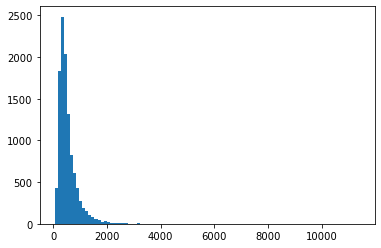

In [5]:
plt.hist(df['area'], bins = 100)

In [11]:
np.quantile(df['area'], 0.95)

1216.0

In [12]:
len(df)

11017

In [13]:
lower_quantile = df.quantile(0.05)
upper_quantile = df.quantile(0.95)

In [18]:
upper_quantile['minor_axis_length']

20.577031992409214

In [14]:
lower_quantile

label                 80.000000
area                 184.000000
centroid-0            59.419562
centroid-1            78.354209
major_axis_length     27.137459
minor_axis_length      7.631375
orientation           -1.552332
Name: 0.05, dtype: float64

(array([ 78.,  66., 100., 120., 135., 128., 184., 172., 190., 217., 205.,
        232., 214., 212., 202., 261., 204., 220., 248., 199., 200., 226.,
        209., 193., 219., 183., 161., 180., 166., 158., 161., 151., 148.,
        128., 127., 115., 112., 138., 106.,  98., 112.,  97.,  75.,  99.,
         85.,  82.,  84.,  61.,  70.,  64.,  67.,  65.,  56.,  54.,  70.,
         57.,  53.,  48.,  47.,  52.,  41.,  38.,  28.,  46.,  36.,  35.,
         28.,  33.,  42.,  25.,  28.,  26.,  25.,  23.,  21.,  23.,  17.,
         21.,  20.,  19.,  12.,  17.,  13.,  11.,  10.,  12.,  11.,   6.,
         12.,  17.,  13.,   7.,   8.,   6.,   5.,   8.,   5.,   6.,   5.,
          7.]),
 array([ 184.  ,  194.32,  204.64,  214.96,  225.28,  235.6 ,  245.92,
         256.24,  266.56,  276.88,  287.2 ,  297.52,  307.84,  318.16,
         328.48,  338.8 ,  349.12,  359.44,  369.76,  380.08,  390.4 ,
         400.72,  411.04,  421.36,  431.68,  442.  ,  452.32,  462.64,
         472.96,  483.28,  493.6 ,

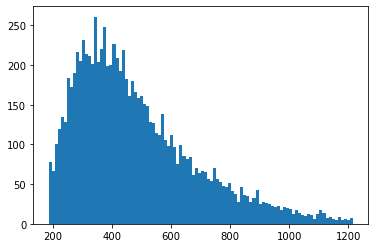

In [27]:
plt.hist(dfFilter[''], bins = 100)

In [21]:
dfFilter = df.loc[(df['area'] >= lower_quantile['area']) & (df['area'] <= upper_quantile['area']) &
             (df['major_axis_length'] >= lower_quantile['major_axis_length']) & (df['major_axis_length'] <= upper_quantile['major_axis_length']) &
             (df['minor_axis_length'] >= lower_quantile['minor_axis_length']) & (df['minor_axis_length'] <= upper_quantile['minor_axis_length'])]

In [22]:
len(dfFilter)

8930

In [24]:
len(df.loc[(df['area'] >= lower_quantile['area']) & (df['area'] <= upper_quantile['area']) ])

9918

In [35]:
np.median(dfFilter['minor_axis_length'])

11.920324277199418

In [34]:
np.mean(dfFilter['minor_axis_length'])

12.35931640596513